## ETL PART 3 - DATA EXPLORATION¶


In [1]:
#Fire up Python
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym
import pylab 
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
%matplotlib inline

In [3]:
#Load dataset
df2 = pd.read_csv("Waste_Mgt_Phoenix_Only_2015_2016_2017.csv",low_memory=False)


In [71]:

df2.set_index('tournament')
print()

In [65]:
df2.columns

Index(['tournament', 'tournament_name', 'year', 'id', 'p_full_name',
       'p_country', 'rnds', 'holes', 'cNum', 'sc', 'pDay', 'pTot', 'shots',
       'pid', 'time', 'putt', 't', 'prv', 'tee', 'cup', 'from', 'to', 'asc',
       'dist', 'left', 'from_x', 'x', 'from_y', 'y', 'z', 'club', 'con',
       'shotText'],
      dtype='object')

In [75]:
df2.loc[(df2['tournament']==3)].iloc[0:4,0:17]

,tournament,tournament_name,year,id,p_full_name,p_country,rnds,holes,cNum,sc,pDay,pTot,shots,pid,time,putt,t
0,3,Waste Management Phoenix Open,2017,1810,Phil Mickelson,USA,1,1,1,4.0,0.0,0.0,1,0,NaN,NaN,S
1,3,Waste Management Phoenix Open,2017,1810,Phil Mickelson,USA,1,1,1,4.0,0.0,0.0,2,0,NaN,NaN,S
2,3,Waste Management Phoenix Open,2017,1810,Phil Mickelson,USA,1,1,1,4.0,0.0,0.0,3,0,NaN,NaN,S
3,3,Waste Management Phoenix Open,2017,1810,Phil Mickelson,USA,1,1,1,4.0,0.0,0.0,4,0,NaN,1.0,S


In [90]:
df2["dist_yards"] = df2.loc[(df2['tournament']==3)&(df2["tee"]=="y"),"dist"].apply(lambda x: x/36)


In [161]:
df2["left_yards"] = df2.loc[(df2['tournament']==3)&(df2["tee"]=="y"),"left"].apply(lambda x: x/36)

In [205]:
df2.loc[(df2['tournament']==3)&(df2["tee"]=="y")].iloc[0:4,17:35]

,prv,tee,cup,from,to,asc,dist,left,from_x,x,from_y,y,z,club,con,shotText,dist_yards,left_yards
0,n,y,n,OTB,ELR,1,9972,4098,NaN,11465.457,NaN,10728.389,1545.551,CFW,NaN,"Shot 1 277 yds to left rough, 114 yds to hole",277.000000,113.833333
4,n,y,n,OTB,ERI,1,10721,5525,NaN,11411.791,NaN,10284.140,1540.013,CDR,NaN,"Shot 1 298 yds to right intermediate, 153 yds ...",297.805556,153.472222
8,n,y,n,OTB,ELF,1,11432,8285,NaN,10479.019,NaN,10145.659,1531.007,CDR,NaN,"Shot 1 318 yds to left fairway, 230 yds to hole",317.555556,230.138889
12,n,y,n,OTB,OGR,1,6971,119,NaN,9544.018,NaN,11039.358,1546.678,CUK,NaN,"Shot 1 194 yds to green, 9 ft 11 in. to hole",193.638889,3.305556


In [98]:
df2_dist_yards = df2.loc[(df2['tournament']==3)&(df2["tee"]=="y"),"dist_yards"]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


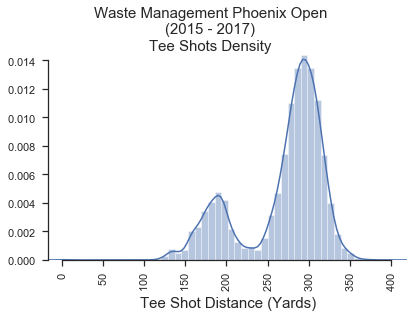

In [144]:
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
# Name the plot type and the variable to be plotted using the structure.
ax = sns.distplot(df2_dist_yards)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
plt.suptitle("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Tee Shots Density", y=1.1, size=15)
plt.xticks(rotation=90)
ax.set_xlabel(r"Tee Shot Distance (Yards)" , labelpad=5, size=15)
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


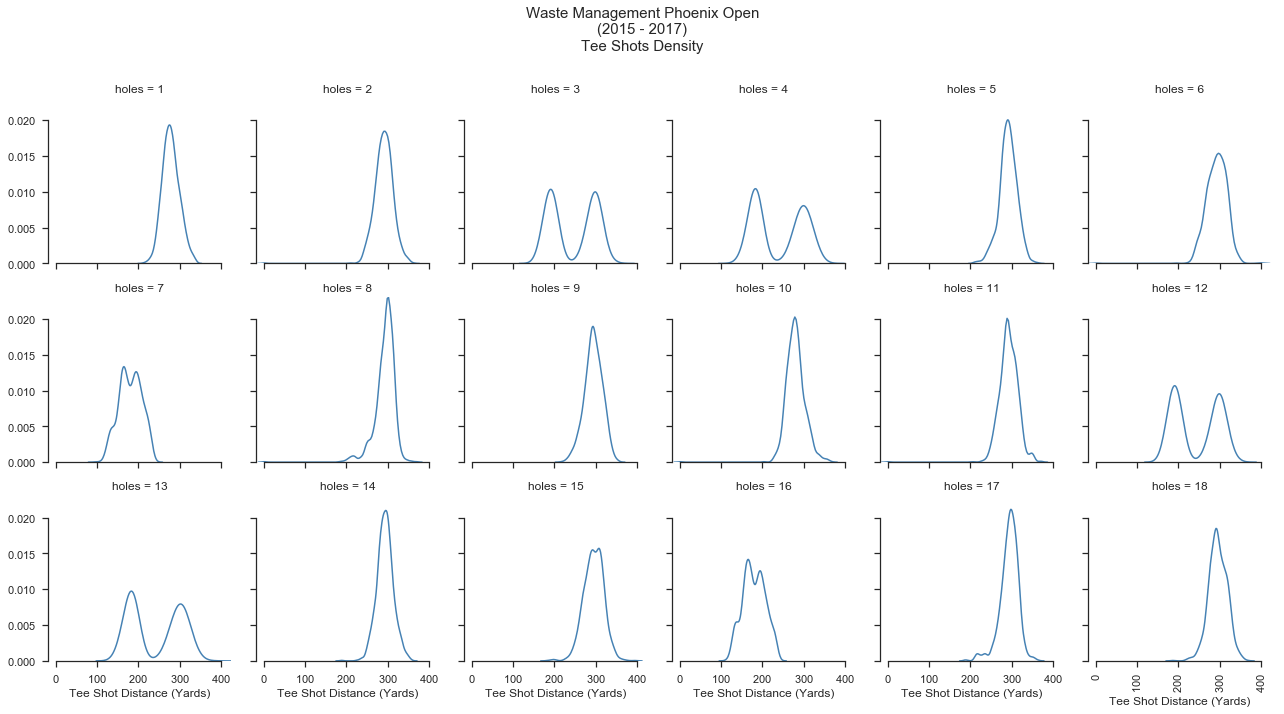

In [143]:
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(df2, col="holes",col_wrap=6)
# Name the plot type and the variable to be plotted using the structure.
g.map(sns.distplot, "dist_yards", hist=False, color="steelblue")

# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels(r"Tee Shot Distance (Yards)")
plt.suptitle("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Tee Shots Density", y=1.1, size=15)
plt.xticks(rotation=90)
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


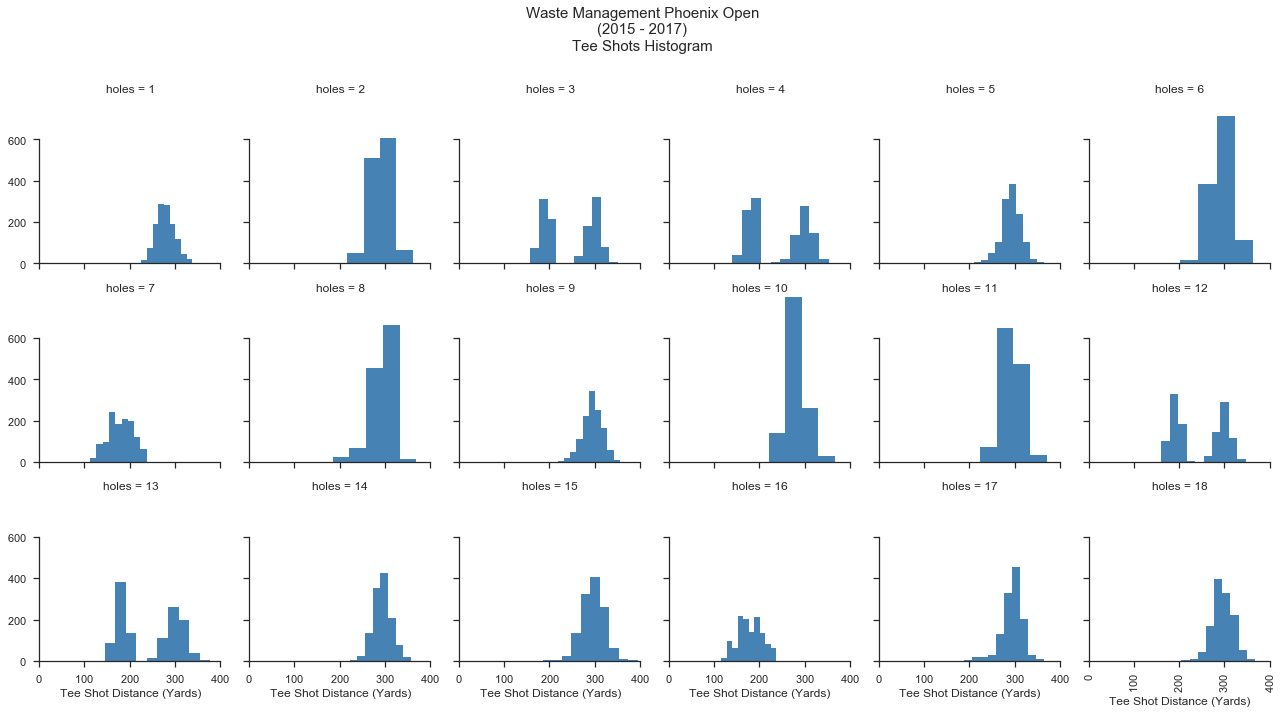

In [142]:
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(df2, col="holes",col_wrap=6)
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "dist_yards", color="steelblue",  lw=0)

# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels(r"Tee Shot Distance (Yards)")
plt.suptitle("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Tee Shots Histogram", y=1.1, size=15)
plt.xticks(rotation=90)
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


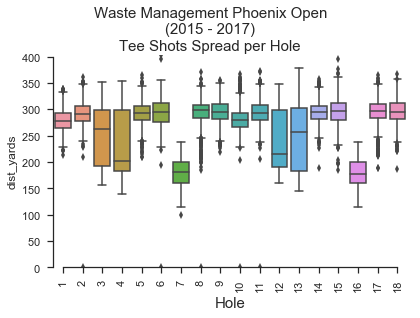

In [107]:
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
# Name the plot type and the variable to be plotted using the structure.
ax = sns.boxplot(x='holes',y='dist_yards',data=df2) 
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
plt.suptitle("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Tee Shots Spread per Hole", y=1.1, size=15)
plt.xticks(rotation=90)
ax.set_xlabel(r"Hole" , labelpad=5, size=15)
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


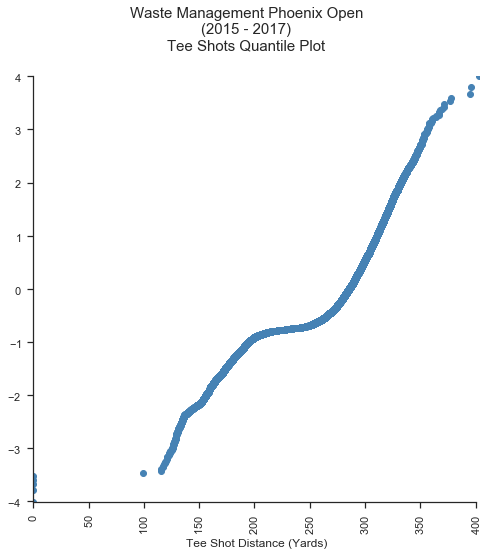

In [141]:
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic


def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, lw=2, **kwargs)
    
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
    


# Tell seaborn about the structure of our data.
g = sns.FacetGrid(df2,height=7)
# Name the plot type and the variable to be plotted using the structure.
g.map(quantile_plot, "dist_yards", color="steelblue")

# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels(r"Tee Shot Distance (Yards)")
plt.suptitle("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Tee Shots Quantile Plot", y=1.1, size=15)
plt.xticks(rotation=90)
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


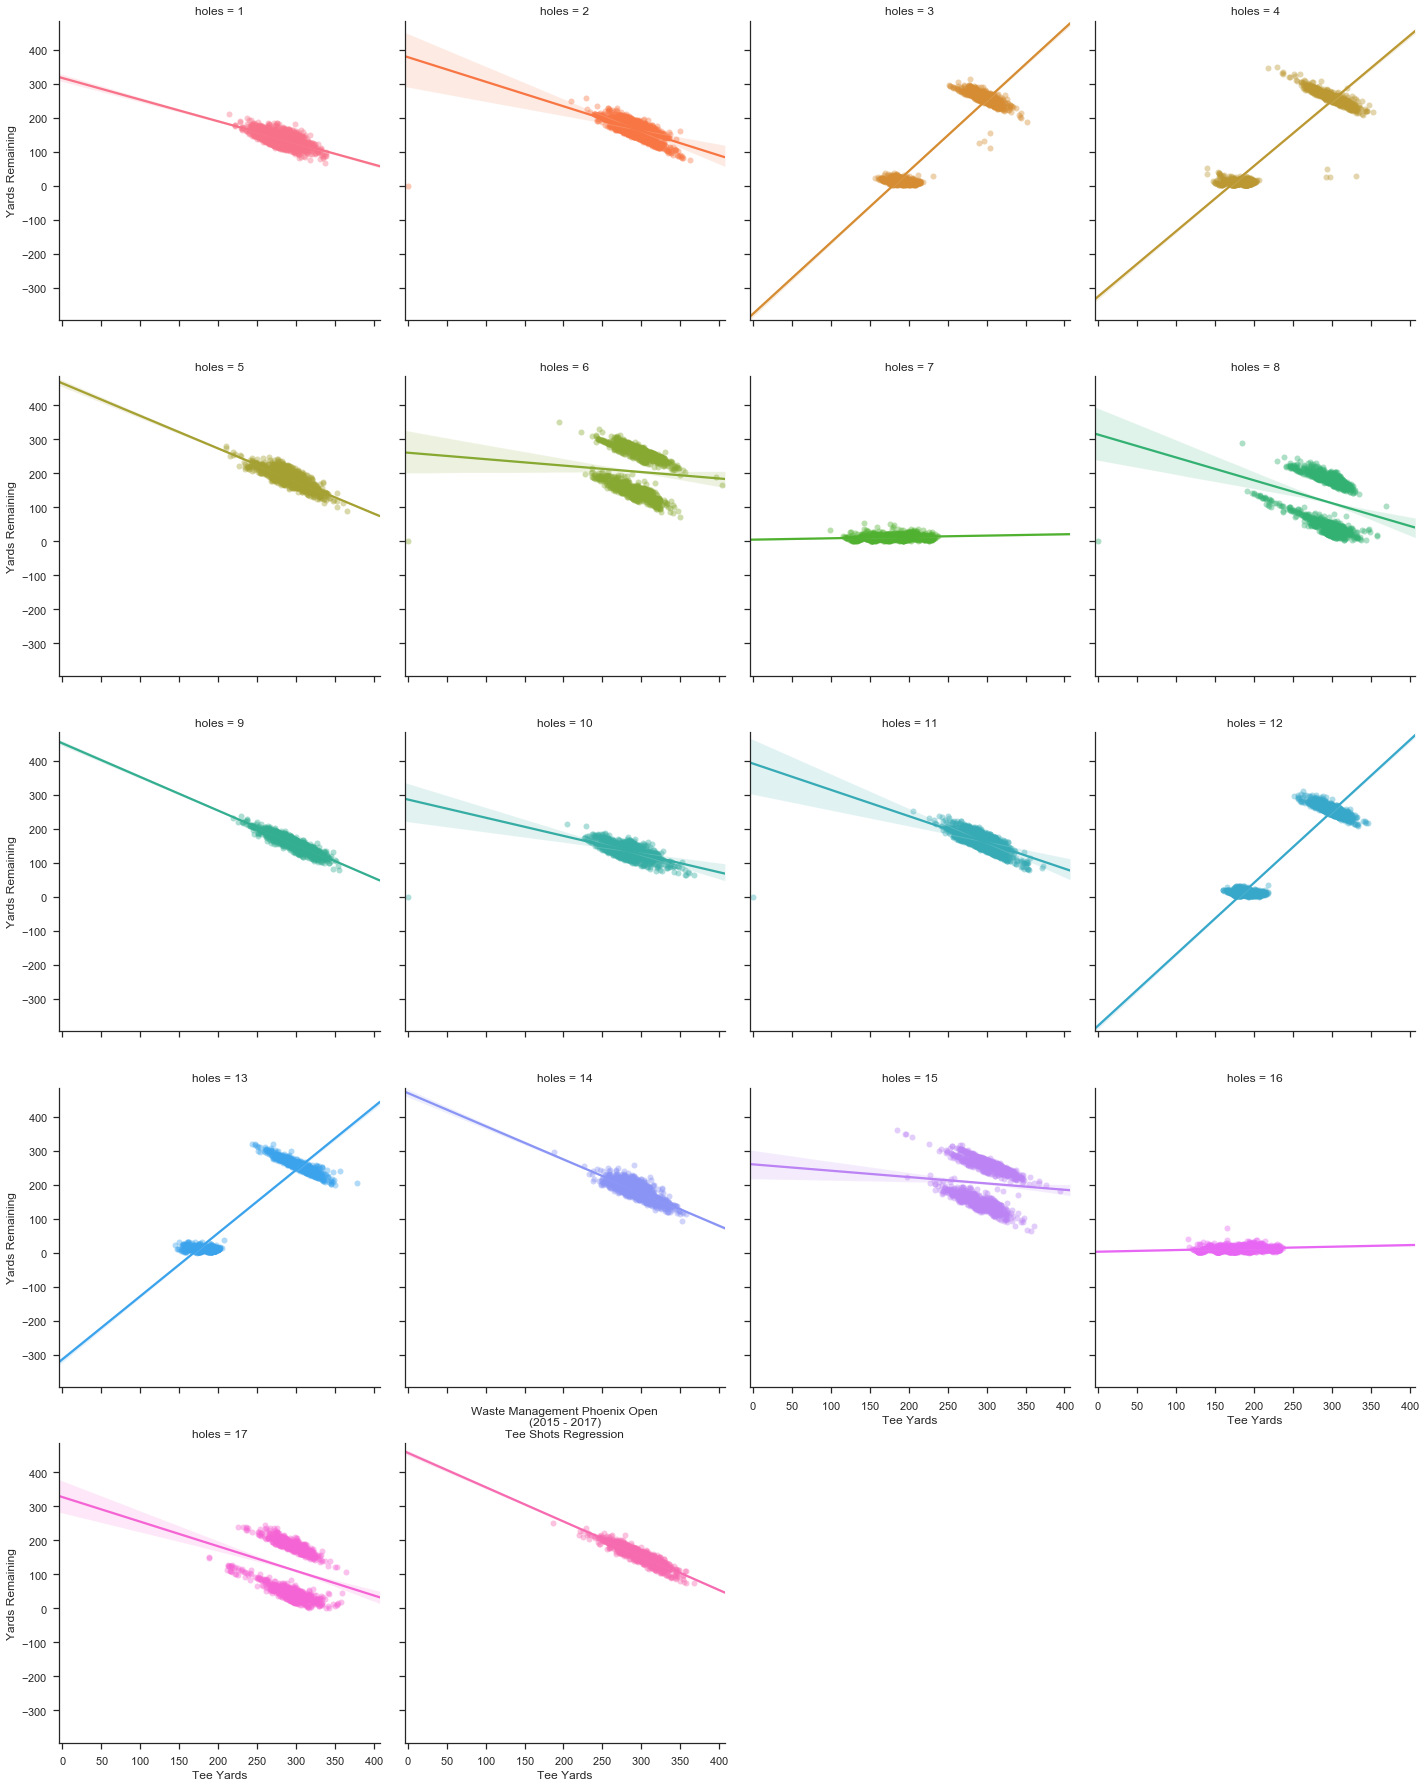

In [172]:
g = sns.lmplot(y='left_yards', 
               x='dist_yards',
               hue="holes",
               col="holes",
               col_wrap=4,
               data=df2, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Yards Remaining")
g.set_xlabels("Tee Yards")
plt.title("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Tee Shots Regression by Hole")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


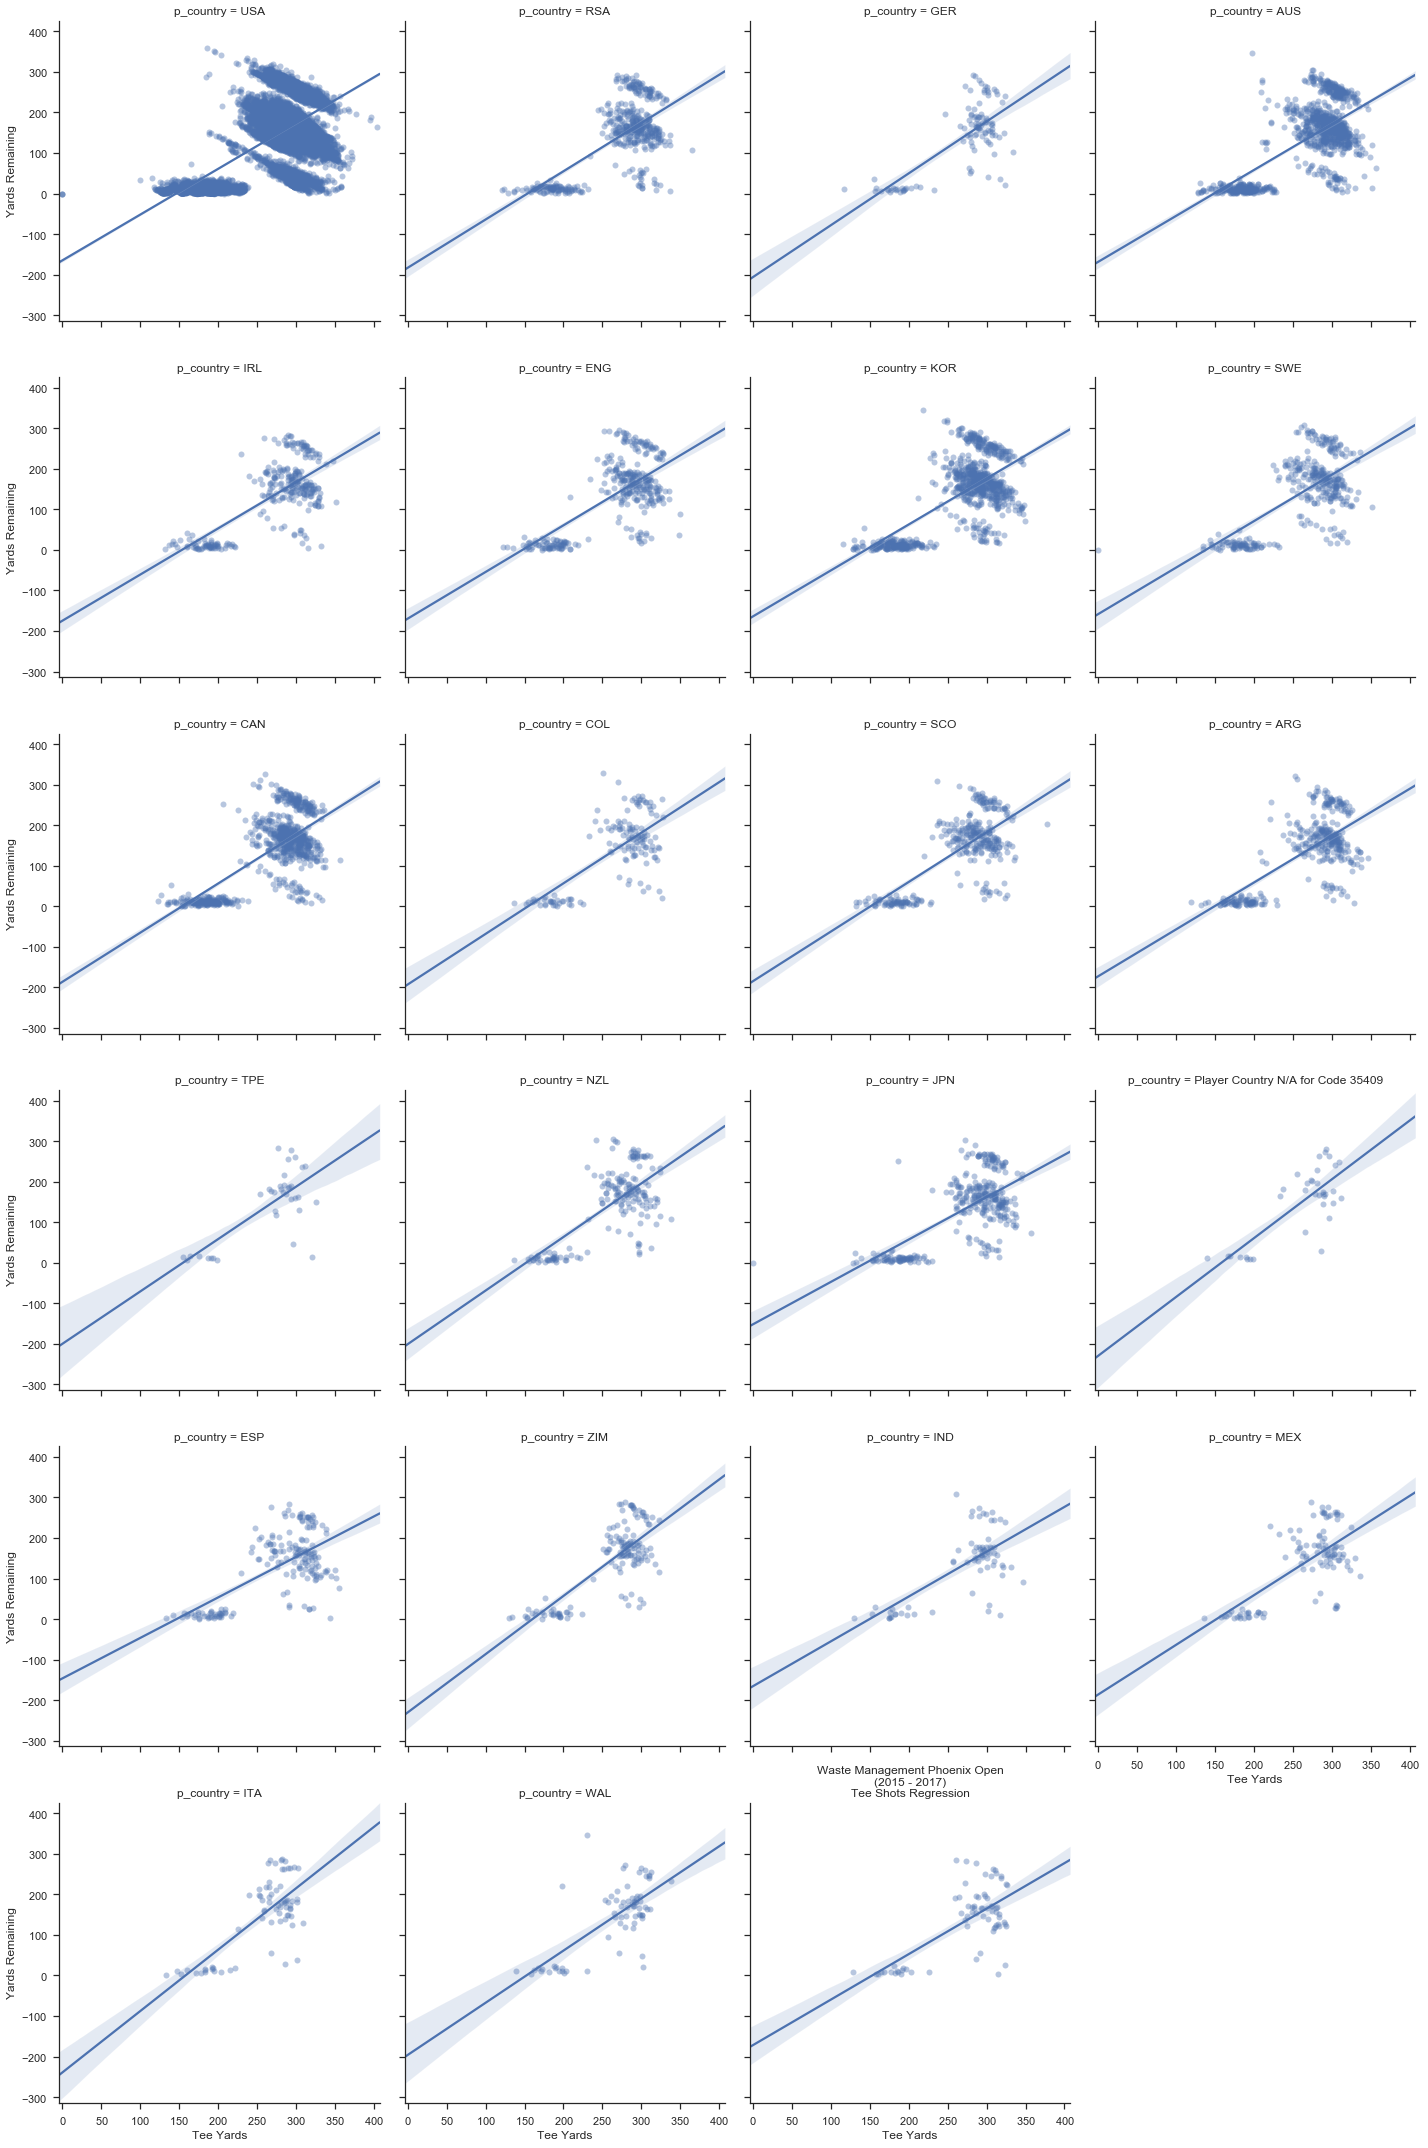

In [177]:
g = sns.lmplot(y='left_yards', 
               x='dist_yards',
               col="p_country",
               col_wrap=4,
               data=df2, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Yards Remaining")
g.set_xlabels("Tee Yards")
plt.title("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Tee Shots Regression by Country")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


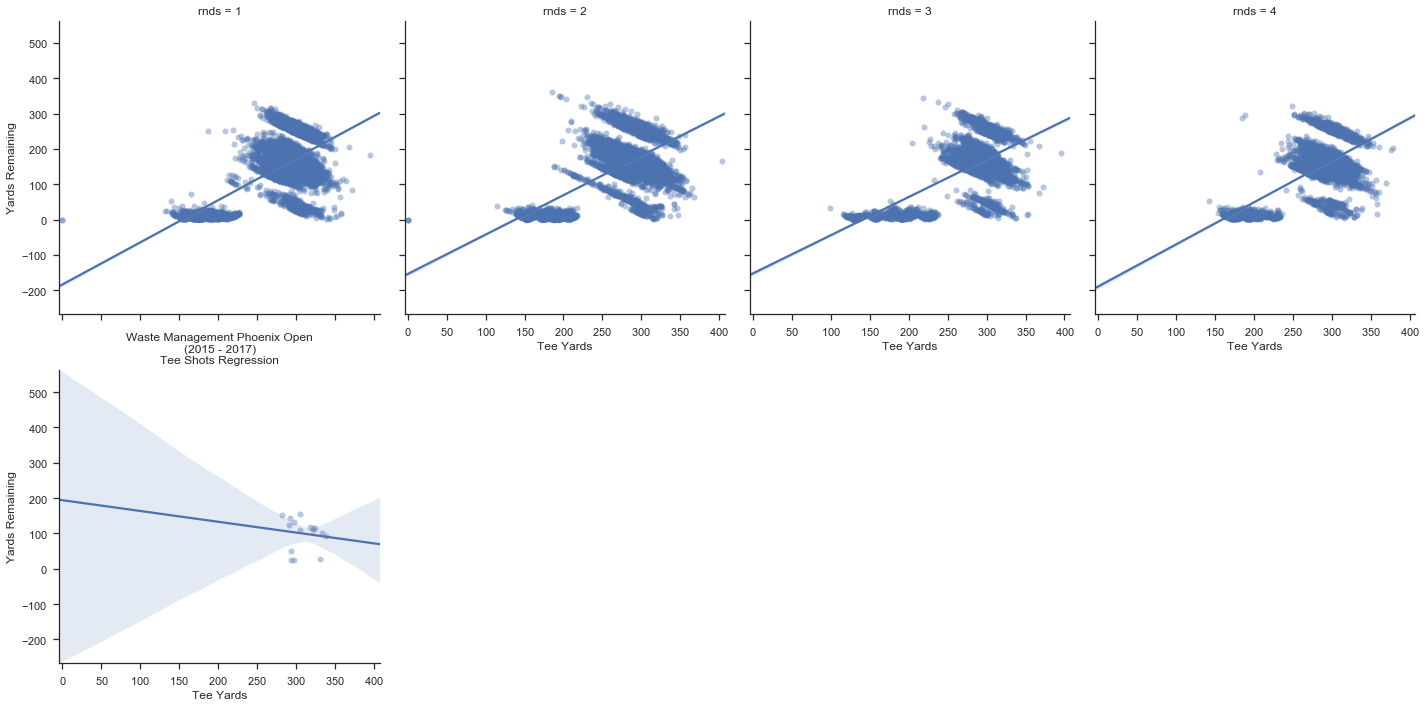

In [180]:
g = sns.lmplot(y='left_yards', 
               x='dist_yards',
               col="rnds",
               col_wrap=4,
               data=df2, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Yards Remaining")
g.set_xlabels("Tee Yards")
plt.title("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Tee Shots Regression by Rounds")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


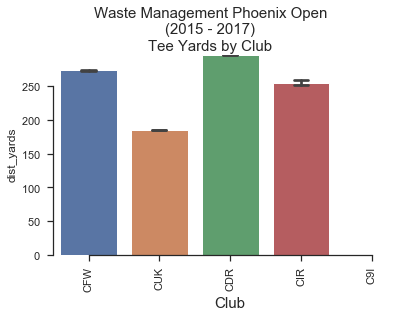

In [197]:
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
# Name the plot type and the variable to be plotted using the structure.
ax = sns.barplot(x='club',y='dist_yards',data=df2,estimator=np.mean,capsize=.2) 
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
plt.suptitle("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Tee Yards by Club", y=1.1, size=15)
plt.xticks(rotation=90)
ax.set_xlabel(r"Club" , labelpad=5, size=15)
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


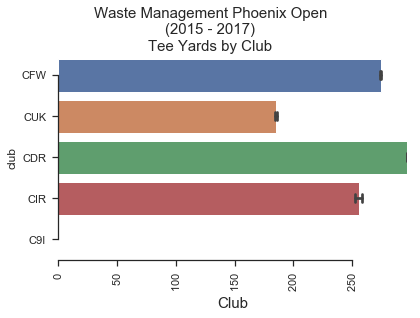

In [217]:
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
# Name the plot type and the variable to be plotted using the structure.
ax = sns.barplot(x='dist_yards',y='club',data=df2,estimator=np.mean,capsize=.2) 
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
plt.suptitle("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Tee Yards by Club", y=1.1, size=15)
plt.xticks(rotation=90)
ax.set_xlabel(r"Club" , labelpad=5, size=15)
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


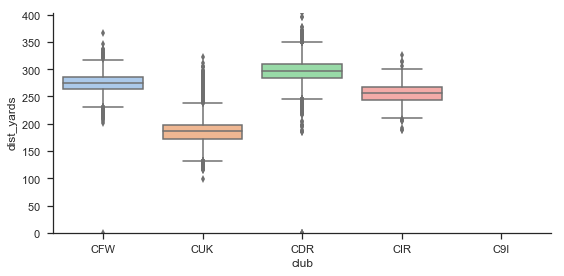

In [213]:


g = sns.catplot(x="club", y="dist_yards", kind="box",
            palette="pastel", height=4, aspect=2,
                data=df2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


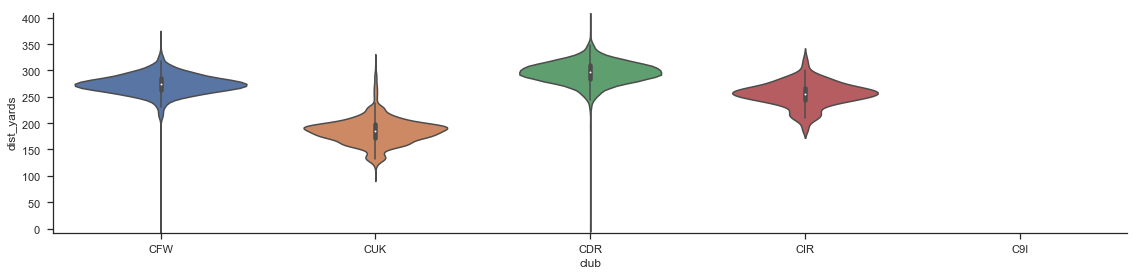

In [207]:
g = sns.catplot(x="club", y="dist_yards",
                kind="violin", height=4, aspect=4,
                data=df2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


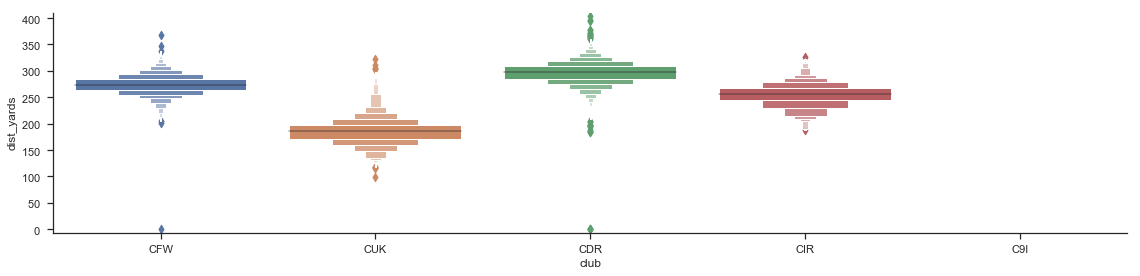

In [225]:
g = sns.catplot(y="dist_yards", x="club", kind="boxen", height=4, aspect=4, data=df2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


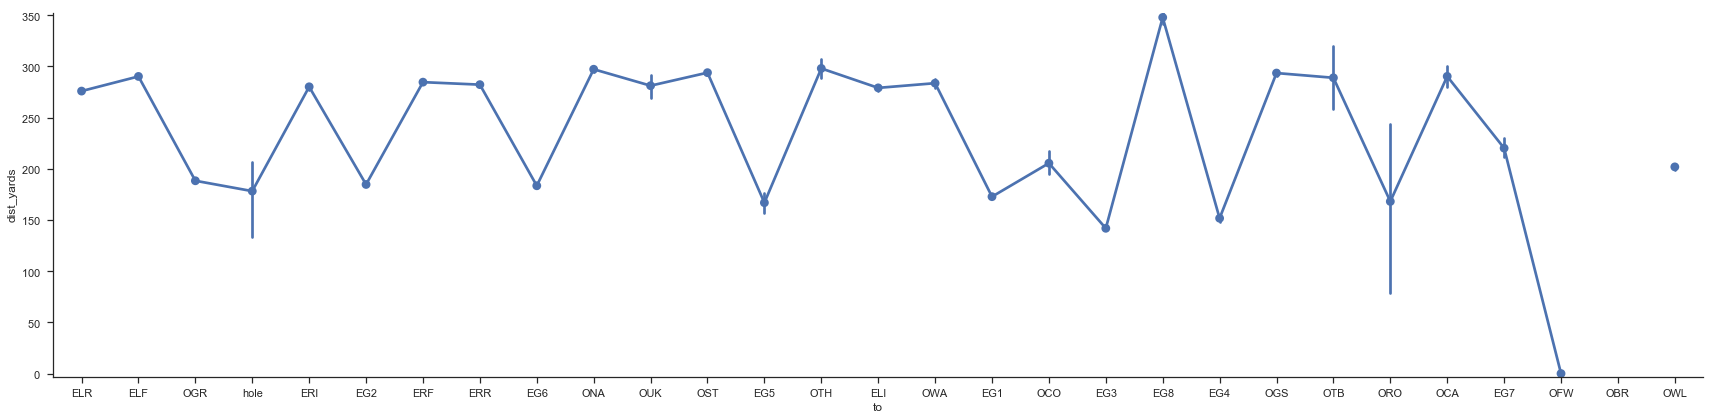

In [214]:
g = sns.catplot(y="dist_yards",x="to", 
                kind="point", height=6, aspect=4,
                data=df2)

## END